# Wiki Scrapin

Wikipedia has an API for accessing random articles, which will help with downloading 1000 articles

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import bs4
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.spatial.distance import cosine
from _utils import *
from joblib import load

In [2]:
WIKIPEDIA_RANDOM = 'https://en.wikipedia.org/wiki/Special:Random'

In [3]:
response = requests.get(WIKIPEDIA_RANDOM)
parsed = bs4.BeautifulSoup(response.text)
parsed.title.string

'The Tent (film) - Wikipedia'

In [4]:
example_title,example_url,example_text = get_title_and_text()
example_text

'\nCross Roads is an unincorporated community in Montgomery-Smalley Township, Monroe County, Arkansas, United States.[2] The community is located where Arkansas Highway 17 ends at Arkansas Highway 1.[3]\n\nThis article about a location in Monroe County, Arkansas is a stub. You can help Wikipedia by expanding it.'

In [5]:
word_stemmer(example_text)

['cross',
 'road',
 'unincorp',
 'commun',
 'montgomery-smalley',
 'town',
 ',',
 'monro',
 'county',
 ',',
 'arkansa',
 ',',
 'unit',
 'stat',
 '.',
 '[',
 '2',
 ']',
 'commun',
 'loc',
 'wher',
 'arkansa',
 'highway',
 '17',
 'end',
 'arkansa',
 'highway',
 '1',
 '.',
 '[',
 '3',
 ']',
 'thi',
 'artic',
 'loc',
 'monro',
 'county',
 ',',
 'arkansa',
 'stub',
 '.',
 'help',
 'wikiped',
 'expand',
 '.']

We will use a Tfidf Vectorizer to store the data

In [6]:
tfidf=TfidfVectorizer(use_idf=True, smooth_idf=False)

In [7]:
df = pd.read_csv(".\\data\\articles.csv",index_col=0)

In [8]:
df

,00,000,00000,000m,001,002,005,00641,0065,007,...,香炉罐,黄龙峡漂流,龔心湛,龚心湛,경운,교태,범죄소년,애교,에버랜드,장안
https://en.wikipedia.org/wiki/Iglas_Assembly_constituency,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Methodist_Episcopal_Church_of_Butler,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"https://en.wikipedia.org/wiki/Russell_House_(Mountain_Rest,_South_Carolina)",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Sait_Faik_Short_Story_Award,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Anika_Rodr%C3%ADguez,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"https://en.wikipedia.org/wiki/Mottsville,_Nevada",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Jos_Verstappen,0.0,0.004904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Urraca,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Kozara_(film),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
tfidf = load(".\\model\\tfidf_model.joblib")
tfidf

TfidfVectorizer(smooth_idf=False)

In [28]:
def recommend_articles(df,tfidf,queries,n=3):
    recommended = {}
    for query in queries:
        _,url,text = get_title_and_text(query)
        q_stem = " ".join(word_stemmer(text))
        q_array = tfidf.transform([q_stem]).toarray()[0]
        values = (1-df.apply(lambda x: cosine(x, q_array), axis=1).sort_values())
        recommended[query] = (values[:n].index,values[:n])
    
    return recommended

In [30]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Battle_of_Berlin",
    "https://en.wikipedia.org/wiki/Jesus",
    "https://en.wikipedia.org/wiki/Pozna%C5%84",
    "https://en.wikipedia.org/wiki/Monkey",
    "https://en.wikipedia.org/wiki/Mars",
    "https://en.wikipedia.org/wiki/FIFA_World_Cup",
    "https://en.wikipedia.org/wiki/Kurt_Cobain",
    "https://en.wikipedia.org/wiki/North_Korea",
    "https://en.wikipedia.org/wiki/Communism",
    "https://en.wikipedia.org/wiki/Chocolate"
],5)

{'https://en.wikipedia.org/wiki/Battle_of_Berlin': (Index(['https://en.wikipedia.org/wiki/Alime_Abdenanova',
         'https://en.wikipedia.org/wiki/La_part_de_l%27autre',
         'https://en.wikipedia.org/wiki/3rd_(Royal_Northumberland_Fusiliers)_Reconnaissance_Regiment',
         'https://en.wikipedia.org/wiki/Warwickshire_Royal_Horse_Artillery',
         'https://en.wikipedia.org/wiki/344th_Moonlight_Battery,_Royal_Artillery'],
        dtype='object'),
  https://en.wikipedia.org/wiki/Alime_Abdenanova                                                0.249706
  https://en.wikipedia.org/wiki/La_part_de_l%27autre                                            0.205126
  https://en.wikipedia.org/wiki/3rd_(Royal_Northumberland_Fusiliers)_Reconnaissance_Regiment    0.192133
  https://en.wikipedia.org/wiki/Warwickshire_Royal_Horse_Artillery                              0.178951
  https://en.wikipedia.org/wiki/344th_Moonlight_Battery,_Royal_Artillery                        0.156887
  dtype: float

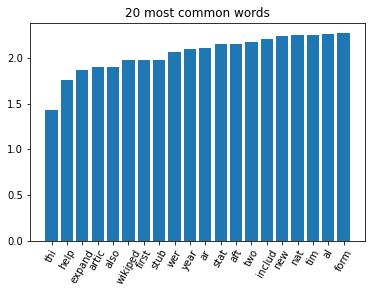

In [55]:
values = pd.Series(tfidf.idf_, index=tfidf.get_feature_names_out()).sort_values()[:20]
x,y = values.index,values

plt.bar(x,y)
plt.xticks(rotation = 60)
plt.title("20 most common words")
plt.show()

c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


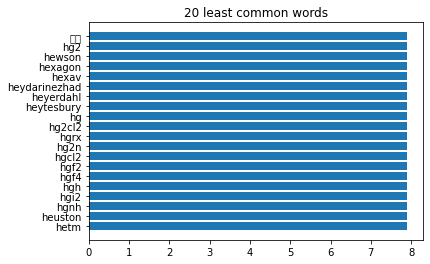

In [70]:
values = pd.Series(tfidf.idf_, index=tfidf.get_feature_names_out()).sort_values()[-20:]
x,y = values.index,values

plt.barh(x,y)
plt.title("20 least common words")
plt.show()